In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [5]:
#normalise data
x_train=x_train/255
x_test=x_test/255

#hot encode the labels
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

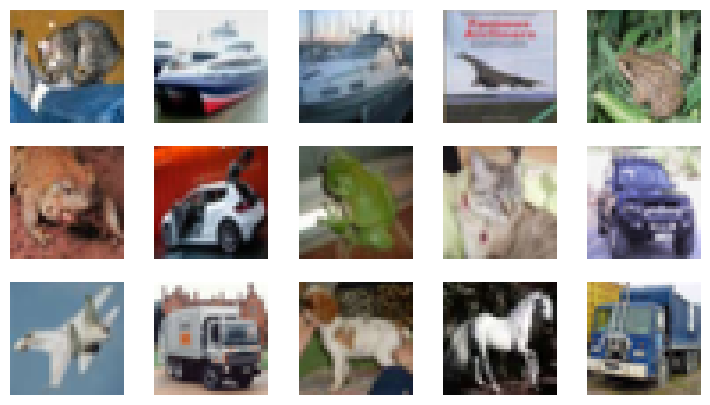

In [26]:
fig,axes=plt.subplots(3,5,figsize=(9,5))
for i,val in enumerate(axes.flat):
    val.imshow(x_test[i])
    val.axis("off")
plt.show()

In [37]:
#create a base model
import tensorflow as tf

base_model=tf.keras.Sequential()
base_model.add(tf.keras.layers.Input(shape=np.shape(x_train[0]))),
base_model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu")),
base_model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3))),
base_model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu")),
base_model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3))),
base_model.add(tf.keras.layers.Flatten()),
base_model.add(tf.keras.layers.Dense(128,activation='relu')),
base_model.add(tf.keras.layers.Dense(256,activation='relu')),
base_model.add(tf.keras.layers.Dense(units='10',activation='softmax'))

base_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
base_model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 10, 10, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 2, 2, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)             

In [38]:
base_model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 63s 39ms/step - loss: 1.5956 - accuracy: 0.4079 - val_loss: 1.3824 - val_accuracy: 0.5046
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2715 - accuracy: 0.5437 - val_loss: 1.1960 - val_accuracy: 0.5744
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1482 - accuracy: 0.5913 - val_loss: 1.1223 - val_accuracy: 0.6002
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0696 - accuracy: 0.6200 - val_loss: 1.1381 - val_accuracy: 0.5958
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0064 - accuracy: 0.6442 - val_loss: 1.0366 - val_accuracy: 0.6392
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9558 - accuracy: 0.6625 - val_loss: 1.0744 - val_accuracy: 0.6256
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9108 - accuracy: 0.6788 - val_loss: 1.0101 -

In [39]:
base_model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9622 - accuracy: 0.6668


[0.9621620178222656, 0.6668000221252441]

In [36]:
base_model.save("saved_models")

INFO:tensorflow:Assets written to: saved_models\assets


INFO:tensorflow:Assets written to: saved_models\assets


In [49]:
import tensorflow_model_optimization as tfmot

quantization_aware_model= tfmot.quantization.keras.quantize_model(base_model)
quantization_aware_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
quantization_aware_model.fit(x_train, y_train,batch_size=32, epochs=10,validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 85s 53ms/step - loss: 0.7837 - accuracy: 0.7224 - val_loss: 0.9621 - val_accuracy: 0.6736
Epoch 2/15
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7506 - accuracy: 0.7355 - val_loss: 1.0288 - val_accuracy: 0.6589
Epoch 3/15
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7265 - accuracy: 0.7415 - val_loss: 0.9806 - val_accuracy: 0.6666
Epoch 4/15
1563/1563 [==============================] - 81s 52ms/step - loss: 0.6943 - accuracy: 0.7524 - val_loss: 0.9610 - val_accuracy: 0.6781
Epoch 5/15
1563/1563 [==============================] - 84s 54ms/step - loss: 0.6740 - accuracy: 0.7633 - val_loss: 0.9988 - val_accuracy: 0.6720
Epoch 6/15
1563/1563 [==============================] - 83s 53ms/step - loss: 0.6483 - accuracy: 0.7686 - val_loss: 1.0084 - val_accuracy: 0.6681
Epoch 7/15
1563/1563 [==============================] - 82s 52ms/step - loss: 0.6227 - accuracy: 0.7784 - val_loss: 1.0165 -

In [57]:
loss,accuracy=quantization_aware_model.evaluate(x_test,y_test)
print("Accuracy: ",accuracy*100)

313/313 [==============================] - 4s 12ms/step - loss: 1.2276 - accuracy: 0.6621
Accuracy:  66.21000170707703


In [ ]:
#post quantization

In [54]:
converter = tf.lite.TFLiteConverter.from_keras_model(base_model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_model=converter.convert()

INFO:tensorflow:Assets written to: C:\Users\krish\AppData\Local\Temp\tmputonn1v2\assets


INFO:tensorflow:Assets written to: C:\Users\krish\AppData\Local\Temp\tmputonn1v2\assets
